In [88]:
"""Data and Sampling Distributions."""

'Data and Sampling Distributions.'

# Practical Statistics for Data Scientists (2nd edition)
# Chapter 2. Data and Sampling Distributions
> (c) 2020 Peter Bruce, Andrew Bruce, Peter Gedeck

Import required Python packages.

In [89]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.pylab import cast
from scipy import stats
from sklearn.utils import resample

%matplotlib inline

In [90]:
try:
    import common

    DATA = common.dataDirectory()
except ImportError:
    DATA = Path().resolve() / "data"

Define paths to data sets. If you don't keep your data in the same directory as the code, adapt the path names.

In [91]:
LOANS_INCOME_CSV = DATA / "loans_income.csv"
SP500_DATA_CSV = DATA / "sp500_data.csv.gz"

Figure 2.1

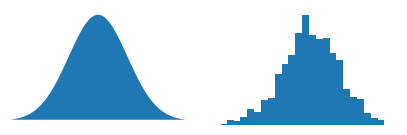

In [92]:
np.random.seed(seed=1)
a_var = np.linspace(-3, 3, 300)
xsample = stats.norm.rvs(size=1000)

fig, axes = plt.subplots(ncols=2, figsize=(5, 1.5))

ax = axes[0]
ax.fill(a_var, stats.norm.pdf(a_var))
ax.set_axis_off()
ax.set_xlim(-3, 3)

ax = axes[1]
ax.hist(xsample, bins=30)
ax.set_axis_off()
ax.set_xlim(-3, 3)
ax.set_position
# plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)

plt.show()

# Sampling Distribution of a Statistic

In [93]:
loans_income = cast(
    "pd.Series[float]", pd.read_csv(LOANS_INCOME_CSV).squeeze("columns")
)

sample_data = pd.DataFrame(
    {
        "income": loans_income.sample(1000),
        "type": "Data",
    }
)

sample_mean_05 = pd.DataFrame(
    {
        "income": [loans_income.sample(5).mean() for _ in range(1000)],
        "type": "Mean of 5",
    }
)

sample_mean_20 = pd.DataFrame(
    {
        "income": [loans_income.sample(20).mean() for _ in range(1000)],
        "type": "Mean of 20",
    }
)

results_1 = pd.concat([sample_data, sample_mean_05, sample_mean_20])
print(results_1.head())

         income  type
40292   63000.0  Data
38959   92000.0  Data
17361  134000.0  Data
33996   52000.0  Data
26491   43000.0  Data


# The Bootstrap

In [ ]:
medians: list[float] = []
for nrepeat in range(1000):
    sample: "pd.Series[float]" = loans_income.sample(100)
    medians.append(sample.median())
results_2: "pd.Series[float]" = pd.Series(medians)
print("Bootstrap Statistics:")
print(f"original: {loans_income.median()}")
print(f"bias: {results_2.mean() - loans_income.median()}")
print(f"std. error: {results_2.std()}")

Bootstrap Statistics:
original: 62000.0
bias: 81.35549999999785
std. error: 3754.1523702946765


# Confidence Intervals

68760.51844
55734.1


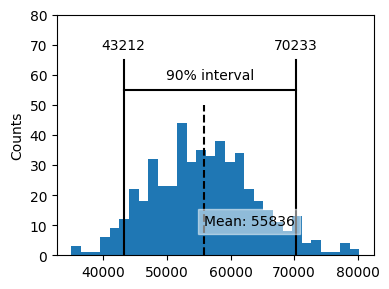

In [ ]:
# fmt: off
print(loans_income.mean())
np.random.seed(seed=3)

sample20: "pd.Series[float]" = resample(loans_income, n_samples=20, replace=False)
print(sample20.mean())

results_3: list[float] = []
for nrepeat in range(500):
    sample_2: "pd.Series[float]" = resample(sample20)
    results_3.append(sample_2.mean())

results_series: "pd.Series[float]" = pd.Series(results_3)

confidence_interval: list[float] = (
    results_series
    .quantile([0.05, 0.95])
    .tolist()
)

ax = results_series.plot.hist(bins=30, figsize=(4, 3))
ax.plot(confidence_interval, [55, 55], color="black")
for b_var in confidence_interval:
    ax.plot([b_var, b_var], [0, 65], color="black")
    ax.text(
        b_var,
        70,
        f"{b_var:.0f}",
        horizontalalignment="center",
        verticalalignment="center",
    )

ax.text(
    sum(confidence_interval) / 2,
    60,
    "90% interval",
    horizontalalignment="center",
    verticalalignment="center",
)

mean_income: float = results_series.mean()
ax.plot([mean_income, mean_income], [0, 50], color="black", linestyle="--")
ax.text(
    mean_income,
    10,
    f"Mean: {mean_income:.0f}",
    bbox={
        "facecolor": "white",
        "edgecolor": "white",
        "alpha": 0.5,
    },
)

ax.set_ylim(0, 80)
ax.set_ylabel("Counts")

plt.tight_layout()
plt.show()
# fmt: on

Text(0, 0.5, 'Counts')

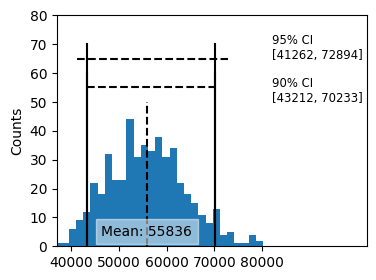

In [ ]:
# fmt: off
np.random.seed(seed=3)
# create a sample of 20 loan income data
sample20 = resample(loans_income, n_samples=20, replace=False)

results_4 = []
for nrepeat in range(500):
    sample_3 = resample(sample20)
    results_4.append(sample_3.mean())
results_4 = pd.Series(results_4)

confidence_interval_2: list[float] = list(results_4.quantile([0.05, 0.95]))
ax = results_4.plot.hist(bins=30, figsize=(4, 3), color="C1")
ax.plot(confidence_interval_2, [55, 55], color="black", linestyle="--")
for c_var in confidence_interval_2:
    ax.plot([c_var, c_var], [0, 60], color="black")
ax.text(
    82000,
    50,
    f"90% CI\n[{confidence_interval_2[0]:.0f}, "
    f"{confidence_interval_2[1]:.0f}]",
    fontsize="small",
)

confidence_interval_3: list[float] = list(results_4.quantile([0.025, 0.975]))
ax = results_4.plot.hist(bins=30, figsize=(4, 3))
ax.plot(confidence_interval_3, [65, 65], color="black", linestyle="--")
for d_var in confidence_interval_2:
    ax.plot([d_var, d_var], [0, 70], color="black")
ax.text(
    82000,
    65,
    f"95% CI\n[{confidence_interval_3[0]:.0f}, {confidence_interval_3[1]:.0f}]",
    fontsize="small",
)
# ax.text(sum(confidence_interval) / 2, 264, '95 % interval',
#         horizontalalignment='center', verticalalignment='center')

mean_income = results_4.mean()
ax.plot([mean_income, mean_income], [0, 50], color="black", linestyle="--")
ax.text(
    mean_income,
    5,
    f"Mean: {mean_income:.0f}",
    bbox={
        "facecolor": "white",
        "edgecolor": "white",
        "alpha": 0.5,
    },
    horizontalalignment="center",
    verticalalignment="center",
)
ax.set_ylim(0, 80)
ax.set_xlim(37000, 102000)
ax.set_xticks([40000, 50000, 60000, 70000, 80000])
ax.set_ylabel("Counts")

# plt.tight_layout()
# plt.show()
# fmt: on

# Normal Distribution
## Standard Normal and QQ-Plots
The package _scipy_ has the function (`scipy.stats.probplot`) to create QQ-plots. The argument `dist` specifies the distribution, which is set by default to the normal distribution.

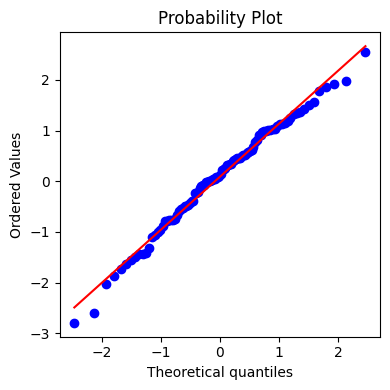

In [97]:
fig, ax = plt.subplots(figsize=(4, 4))

norm_sample = stats.norm.rvs(size=100)
stats.probplot(norm_sample, plot=ax)

plt.tight_layout()
plt.show()

# Long-Tailed Distributions

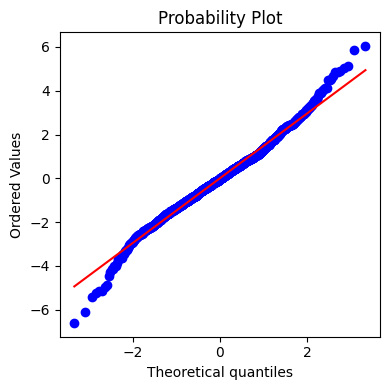

In [98]:
sp500_px = pd.read_csv(SP500_DATA_CSV)

nflx = sp500_px.NFLX
nflx = np.diff(np.log(nflx[nflx > 0]))

fig, ax = plt.subplots(figsize=(4, 4))
stats.probplot(nflx, plot=ax)

plt.tight_layout()
plt.show()

# Binomial Distribution

In [99]:
print(stats.binom.pmf(2, n=5, p=0.1))

0.07289999999999992


In [100]:
print(stats.binom.cdf(2, n=5, p=0.1))

0.99144


# Poisson and Related Distribution
## Poisson Distributions

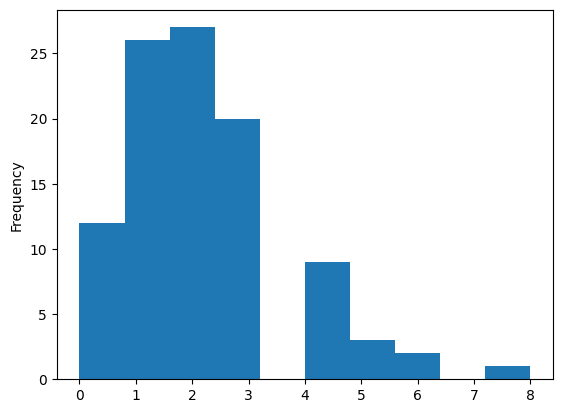

In [101]:
sample = stats.poisson.rvs(2, size=100)

pd.Series(sample).plot.hist()
plt.show()

## Exponential Distribution

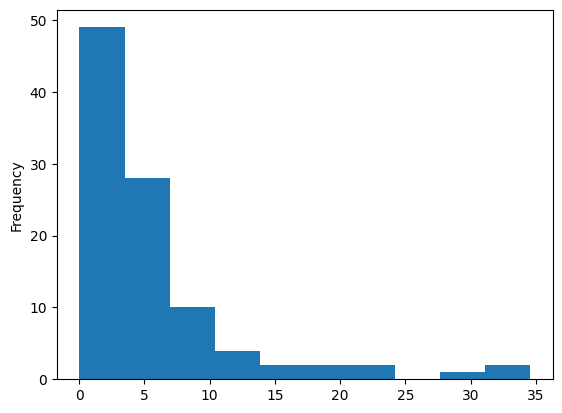

In [102]:
sample = stats.expon.rvs(scale=5, size=100)

pd.Series(sample).plot.hist()
plt.show()

##  Weibull Distribution

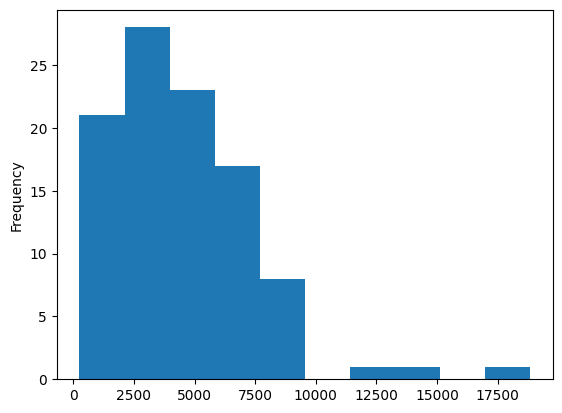

In [103]:
sample = stats.weibull_min.rvs(1.5, scale=5000, size=100)

pd.Series(sample).plot.hist()
plt.show()